In [140]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# This line tells the notebook to show plots inside of the notebook
#%matplotlib inline

In [2]:
##########################
###  Checking the data ###
##########################

In [141]:
dataset_BEV = pd.read_csv('Global.EV.Sales.csv')
dataset_normal = pd.read_csv('Global.ICE.cars.csv')
X_BEV = dataset_BEV.iloc[:, 0:1].values
y_BEV = dataset_BEV.iloc[:, 1].values
X_normal = dataset_normal.iloc[:, 0:1].values
y_normal = dataset_normal.iloc[:, 1].values
dataset_normal.head()

,Year,TOTAL
0,1999,39759847
1,2000,41215653
2,2001,39825888
3,2002,41358394
4,2003,41968666


In [23]:
#pt_charge.describe()

In [73]:
#sb.pairplot(dataset_BEV, hue='class')
;

''

In [ ]:
###########################
###  Preprocessing data ###
###########################

In [ ]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

In [ ]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

In [ ]:
#########################
###  Fitting the data ###
#########################

In [35]:
# Fitting Linear Regression to the dataset

#lin_reg_BEV = LinearRegression()
#lin_reg_BEV.fit(X_BEV, y_BEV)
#lin_reg_Normal = LinearRegression()
#lin_reg_Normal.fit(X_normal, y_normal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
# Fitting Polynomial Regression to the Normal Car dataset

poly_reg_normal = PolynomialFeatures(degree = 3)
X_poly_normal = poly_reg_normal.fit_transform(X_normal)
poly_reg_normal.fit(X_poly_normal, y_normal)
lin_reg_normal = LinearRegression()
lin_reg_normal.fit(X_poly_normal, y_normal)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
# Fitting Polynomial Regression to the EV dataset

y_BEV = y_BEV
poly_reg_BEV = PolynomialFeatures(degree = 3)
X_poly_BEV = poly_reg_BEV.fit_transform(X_BEV)
poly_reg_BEV.fit(X_poly_BEV, y_BEV)
lin_reg_BEV = LinearRegression()
lin_reg_BEV.fit(X_poly_BEV, y_BEV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
##########################
###  Plotting the data ###
##########################

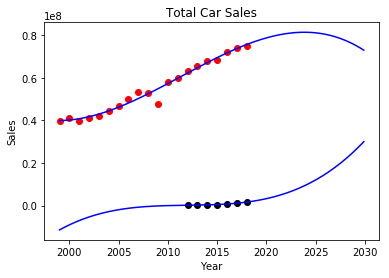

In [146]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

battery_tech = 1
charging_stations = 1
price = 1

X_grid = np.arange(min(X_normal), 2030, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_normal, y_normal, color = 'red')
plt.scatter(X_BEV, y_BEV, color = 'black')
plt.plot(X_grid, lin_reg_normal.predict(poly_reg_normal.fit_transform(X_grid)*(battery_tech*charging_stations*price)), color = 'blue')
plt.plot(X_grid, lin_reg_BEV.predict(poly_reg_BEV.fit_transform(X_grid)), color = 'blue')
plt.title('Total Car Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [111]:
dataset_lit = pd.read_csv('Lithium_prices.csv')
X_lit = dataset_lit.iloc[:, 0:1].values
y_lit = dataset_lit.iloc[:, 1].values
dataset_lit.head()

,Year,price
0,2010,1000
1,2011,800
2,2012,620
3,2013,600
4,2014,500


In [125]:
model = LogisticRegression()
model = model.fit(X_lit, y_lit)
model.predict(2016)

array([200])

In [131]:
# Fitting Polynomial Regression to the Normal Car dataset

poly_reg_lit = PolynomialFeatures(degree = 2)
X_poly_lit = poly_reg_lit.fit_transform(X_lit)
poly_reg_lit.fit(X_poly_lit, y_lit)
lin_reg_lit = LinearRegression()
lin_reg_lit.fit(X_poly_lit, y_lit)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

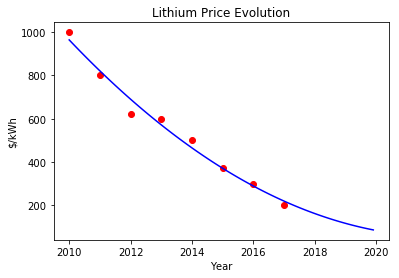

In [132]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_lit), 2020, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_lit, y_lit, color = 'red')
plt.plot(X_grid, lin_reg_lit.predict(poly_reg_lit.fit_transform(X_grid)), color = 'blue')
plt.title('Lithium Price Evolution')
plt.xlabel('Year')
plt.ylabel('$/kWh')
plt.show()